 where we show the counts of good and bad outcomes for cholesterol, gluc, alco variable, active, and smoke for patients with cardio=1 and cardio=0 in different panels.


* Add an 'overweight' column to the data. To determine if a person is overweight, first calculate their BMI by dividing their weight in kilograms by the square of their height in meters. If that value is > 25 then the person is overweight. Use the value 0 for NOT overweight and the value 1 for overweight.
* Normalize data by making 0 always good and 1 always bad. If the value of 'cholestorol' or 'gluc' is 1, make the value 0. If the value is more than 1, make the value 1.
* Clean the data. Filter out the following patient segments that represent incorrect data:
  - diastolic pressure is higher then systolic 
  - height is less than the 2.5th percentile 
  - height is more than the 97.5th percentile
  - weight is less then the 2.5th percentile
  - weight is more than the 97.5th percentile
* Create a correlation matrix using the dataset.



In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("medical_data.csv")
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [3]:
# Add 'overweight' column

df["height_m"]   = df["height"] / 100
df["IBM"]        = df["weight"] /  ( df["height_m"] * df["height_m"] )
df["overweight"] = (df["IBM"] > 25) == 1 
df["overweight"] = df["overweight"].astype(int)

In [4]:
# cholesterol,gluc

df["cholesterol_bin"] = df["cholesterol"] > 1
df["cholesterol"]     =df["cholesterol_bin"].astype(int)

df["gluc_bin"] = df["gluc"] > 1
df["gluc"]     = df["gluc_bin"].astype(int)

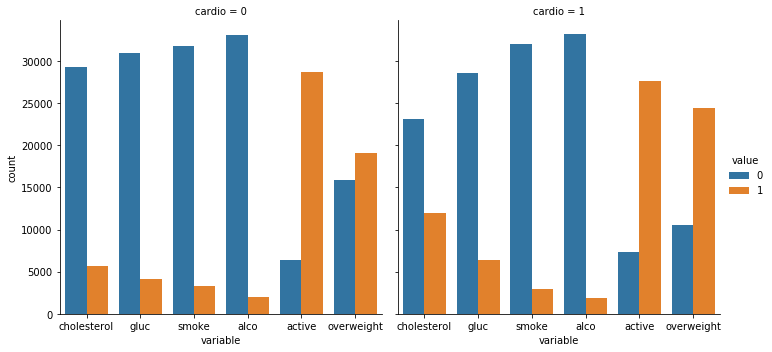

In [5]:
plot_melt = pd.melt(df, id_vars=['cardio'], value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active','overweight'])

fig = sns.catplot(x="variable", y=None, col="cardio",hue="value",
                         data=plot_melt, 
                         kind="count", ci=None )


In [6]:
plot_melt.head(5)

,cardio,variable,value
0,0,cholesterol,0
1,1,cholesterol,1
2,1,cholesterol,1
3,1,cholesterol,0
4,0,cholesterol,0


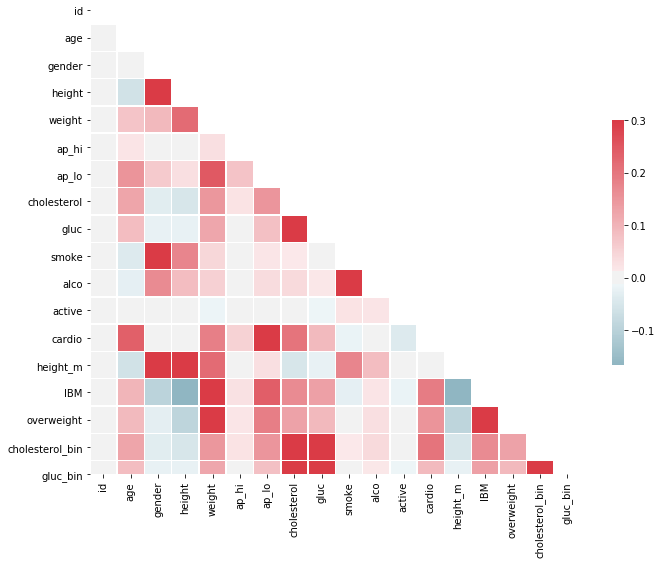

In [10]:
df = df[df['ap_lo'] <= df['ap_hi']]

df      = df[(df['height'] >= df['height'].quantile(0.025))]
df      = df[(df['height'] <= df['height'].quantile(0.975))]
df      = df[(df['height'] >= df['height'].quantile(0.025))]
df_heat = df[(df['height'] <= df['height'].quantile(0.975))]

# Calculate the correlation matrix
corr = df_heat.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap with 'sns.heatmap()'
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
fig = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,center=0,
        square=True, linewidths=.5, cbar_kws={"shrink": .5})